<H1 style="text-align:center;">
Chapter 8: Finding Explanations
</H1>
<hr style="height:5px;">

## Decision tree
<hr style="height:2px;">

In this example, we will construct a decision tree for the Iris data. First, we load the data set as before, and split it into the training (N=100) and testing (N=50) data sets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Loading data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50,
                                                    random_state=2020)

Next, we define a decision tree classification object `DecisionTreeClassifier` available under the `sklearn.tree` library. As we define the classifier object `dt`, we use the entropy criterion (`criterion='entropy'`) to describe sample inhomogeneity at each node. We also set the minimum leaf size `min_samples_leaf` to 3 and the maximum tree depth `max_depth` to 4 in order to avoid overfitting. We seed the random number generator for this algorithm with the random seed `random_state=0`. 

In [2]:
# decision tree classifier
dt = DecisionTreeClassifier(criterion='entropy',
                            min_samples_leaf = 3,
                            max_depth = 4,
                            random_state=0)

Then we train he classifier with the `fit` method.

In [3]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

The trained classifier is then used to generate prediction on the testing data.

In [7]:
# classification on the testing data set
y_pred = dt.predict(X_test)

The confusion matrix and the classification report are generated.

In [8]:
print(confusion_matrix(y_test,y_pred))

[[18  0  0]
 [ 0 14  2]
 [ 0  1 15]]


In [9]:
print(classification_report(y_test, y_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.93      0.88      0.90        16
   virginica       0.88      0.94      0.91        16

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



The resulting decision tree can be visualized by the `plot_tree` function available in the `sklearn.tree` library. The trained classifier is passed on as the required input parameter, along with the feature names and class names.

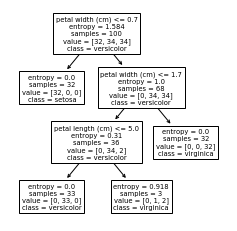

In [10]:
# plotting the tree
plt.figure(figsize=[4,4])
plot_tree(dt, feature_names=feature_names, class_names=target_names)
plt.show()

## Regression
<hr style="height:2px;">

Least square linear regression is implemented with a `LinearRegression` object available in the `sklearn.linear_model` library. In this example, we model the petal width from the Iris data as the dependent variable, and the three other features as the regressors. 

In [11]:
from sklearn.linear_model import LinearRegression

# Target is petal width
y = iris.data[:,3]
# All the other variables are input features
X = iris.data[:,:3]

Now we fit a regression model with the `fit` method. The resulting predictor object is referred as `reg`.

In [12]:
# linear regression learner
reg = LinearRegression().fit(X,y)